In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
times = pd.read_csv("times.csv")
times

,problem,V,E,ratio,time
0,1,100,100,1,58717000
1,1,100,200,2,45054000
2,1,100,294,3,26777000
3,1,300,300,1,258480000
4,1,300,600,2,214917000
5,1,300,894,3,657358000
6,1,500,500,1,855895000
7,1,500,1000,2,736911000
8,1,500,1494,3,835982000
9,1,700,700,1,1700262000


In [7]:
times1 = times[times["problem"] == 1]

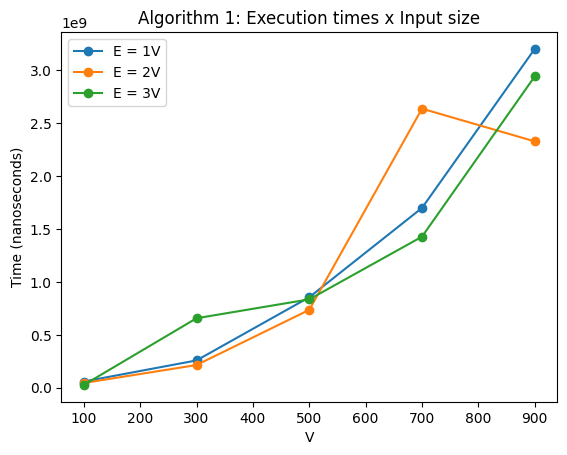

In [8]:
for ratio, group in times1.groupby('ratio'):
    plt.plot(group["V"], group["time"], marker="o", label=f"E = {ratio}V")

plt.legend()
plt.xlabel("V")
plt.ylabel("Time (nanoseconds)")
plt.title("Algorithm 1: Execution times x Input size")
plt.show()